# NAME: ARGHYADEEP HAZRA
## Position: Data Science Intern
### Project: Churn Prediction in Telecom Industry using Logistic Regression

In [1]:
# Importing libraries for data import
import pandas as pd
import numpy as np
import sklearn
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import *
from sklearn.compose import *
from sklearn.model_selection import *
from sklearn.metrics import *
from sklearn.utils import *
from sklearn.metrics import *

### Importing Dataset as df

In [2]:
df=pd.read_csv("Churn.csv")
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [3]:
 
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## PREPROCESSING OF DATA

In [4]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [7]:
print(f"This dataframe has: \nrows:{df.shape[0]}  \ncolumns:{df.shape[1]}")

This dataframe has: 
rows:7043  
columns:21


In [8]:
df['TotalCharges']=pd.to_numeric(df['TotalCharges'], errors='coerce')

In [9]:
df['TotalCharges']

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

In [10]:
df['Contract'].value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

In [11]:
df['gender'].value_counts()

Male      3555
Female    3488
Name: gender, dtype: int64

In [12]:
df['InternetService'].value_counts()

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

In [13]:
df['PaymentMethod'].value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

In [14]:
print(f"The Total Null values in each columns by percentage wise are:\n{df.isnull().sum()}")

The Total Null values in each columns by percentage wise are:
customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


In [15]:
print(f"The Total Null values in each columns by percentage wise are:\n{(df.isnull().sum()/df.shape[0])*100}")

The Total Null values in each columns by percentage wise are:
customerID          0.000000
gender              0.000000
SeniorCitizen       0.000000
Partner             0.000000
Dependents          0.000000
tenure              0.000000
PhoneService        0.000000
MultipleLines       0.000000
InternetService     0.000000
OnlineSecurity      0.000000
OnlineBackup        0.000000
DeviceProtection    0.000000
TechSupport         0.000000
StreamingTV         0.000000
StreamingMovies     0.000000
Contract            0.000000
PaperlessBilling    0.000000
PaymentMethod       0.000000
MonthlyCharges      0.000000
TotalCharges        0.156183
Churn               0.000000
dtype: float64


In [16]:
df['TotalCharges'].median()

1397.475

In [17]:
df.fillna(df['TotalCharges'].median(),inplace=True)

In [18]:
print(f"After filling null values the total Null values in each columns by percentage wise are:\n{df.isnull().sum()}")

After filling null values the total Null values in each columns by percentage wise are:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [19]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## EDA

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Histogram


#### CHURN

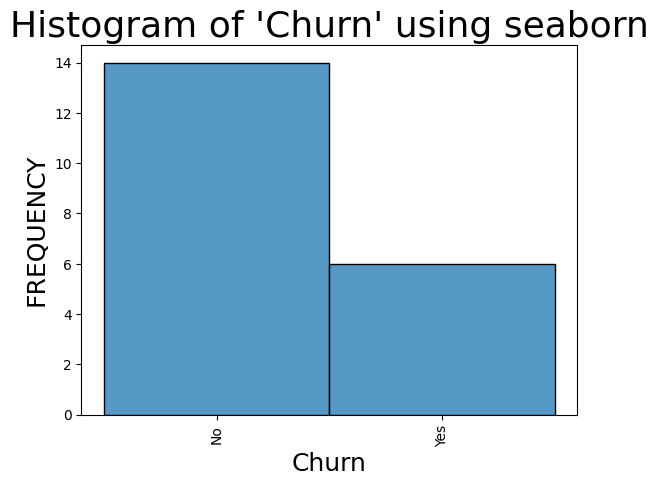

In [21]:
#Histogram for "Churn" frequency 
sns.histplot(data=df.head(20),x='Churn')
plt.title("Histogram of 'Churn' using seaborn",fontsize = 26)
plt.xlabel("Churn",fontsize = 18)
plt.ylabel("FREQUENCY",fontsize = 18)
plt.xticks(rotation=90)
plt.show()

#### InternetService

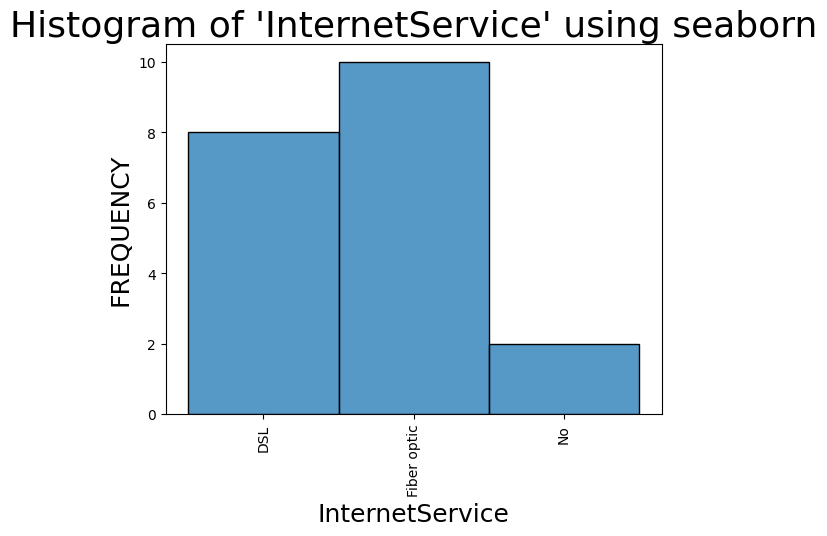

In [22]:
# Histogram of "Internet services"
sns.histplot(data=df.head(20),x='InternetService')
plt.title("Histogram of 'InternetService' using seaborn",fontsize = 26)
plt.xlabel("InternetService",fontsize = 18)
plt.ylabel("FREQUENCY",fontsize = 18)
plt.xticks(rotation=90)
plt.show()

#### Contract

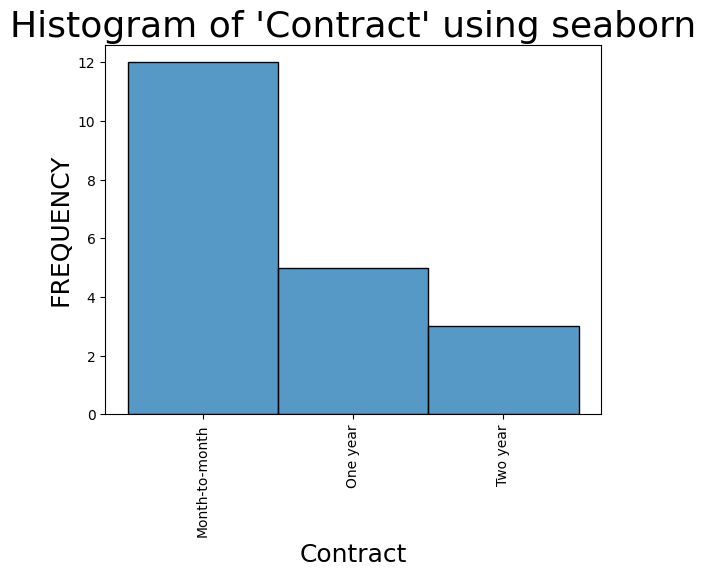

In [23]:
# Histogram of Contracts
sns.histplot(data=df.head(20),x='Contract')
plt.title("Histogram of 'Contract' using seaborn",fontsize = 26)
plt.xlabel("Contract",fontsize = 18)
plt.ylabel("FREQUENCY",fontsize = 18)
plt.xticks(rotation=90)
plt.show()

#### PaymentMethod

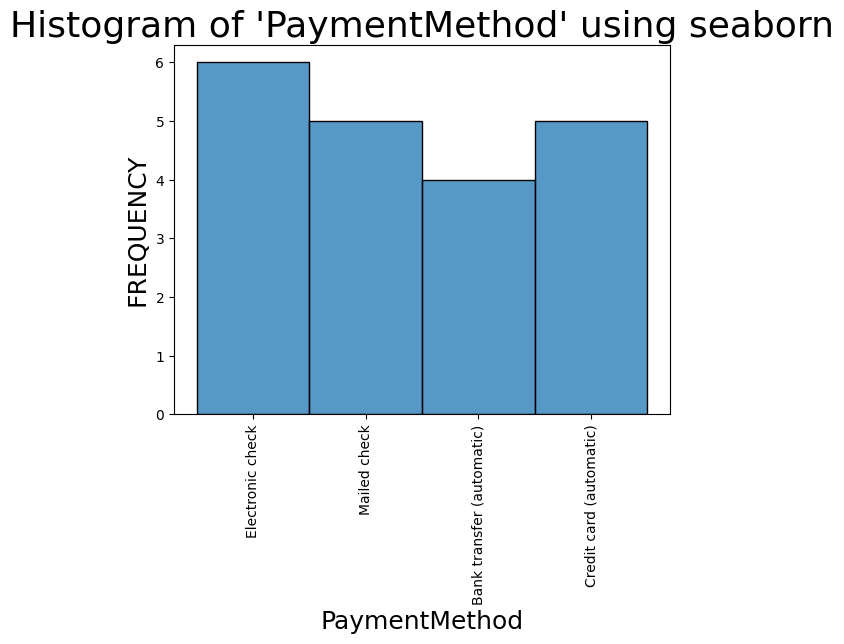

In [24]:
# Histogram of "Payment method"
sns.histplot(data=df.head(20),x='PaymentMethod')
plt.title("Histogram of 'PaymentMethod' using seaborn",fontsize = 26)
plt.xlabel("PaymentMethod",fontsize = 18)
plt.ylabel("FREQUENCY",fontsize = 18)
plt.xticks(rotation=90)
plt.show()

### Pie Chart

#### Churn and Internet Service

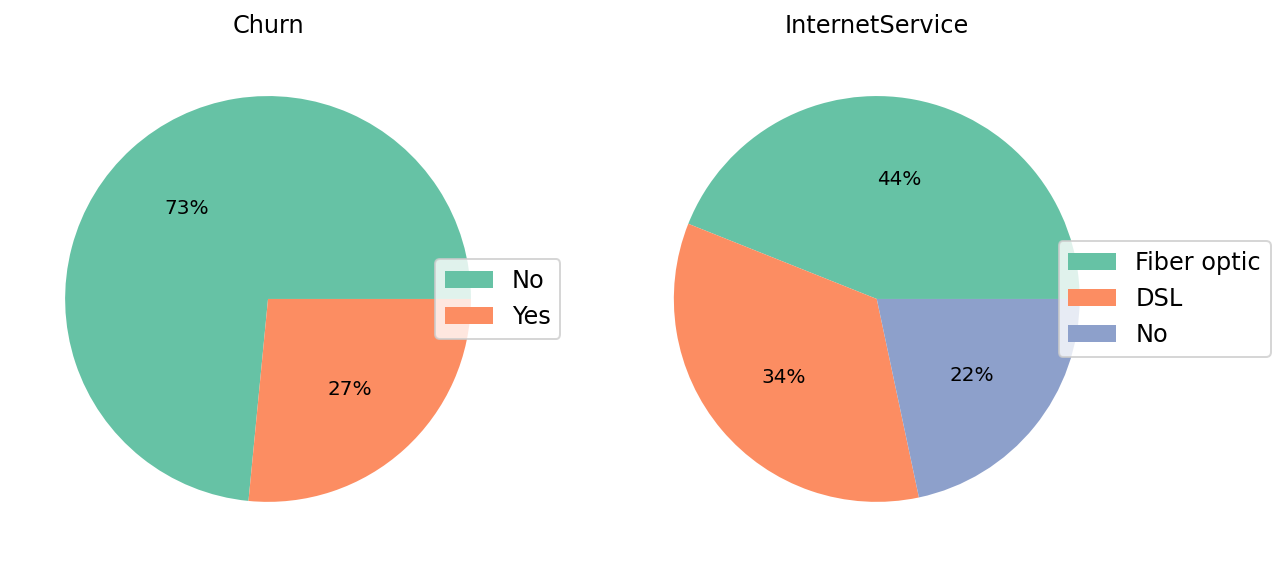

In [25]:
#Pie chart for 'Churn' and 'Internet Services'
fig = plt.figure(figsize=(10,10),dpi=144)
ax1 = fig.add_subplot(121)

curr = df['Churn'].value_counts()
lbl = curr.to_dict().keys()
plt.title('Churn')
colors = sns.color_palette("Set2")
ax1.pie(curr,colors = colors,autopct='%.0f%%')
ax1.legend(labels =lbl,loc='center right', bbox_to_anchor=(1.1, .5), fontsize=12 )


ax2 = fig.add_subplot(122)
curr1 = df['InternetService'].value_counts()
other=df['InternetService'].value_counts
lbl = curr1.to_dict().keys()
plt.title('InternetService')
colors = sns.color_palette("Set2")
ax2.pie(curr1,colors = colors,autopct='%.0f%%')
ax2.legend(labels =lbl,loc='center right', bbox_to_anchor=(1.3, .5), fontsize=12 )


plt.show()

#### Contract and Payment Method

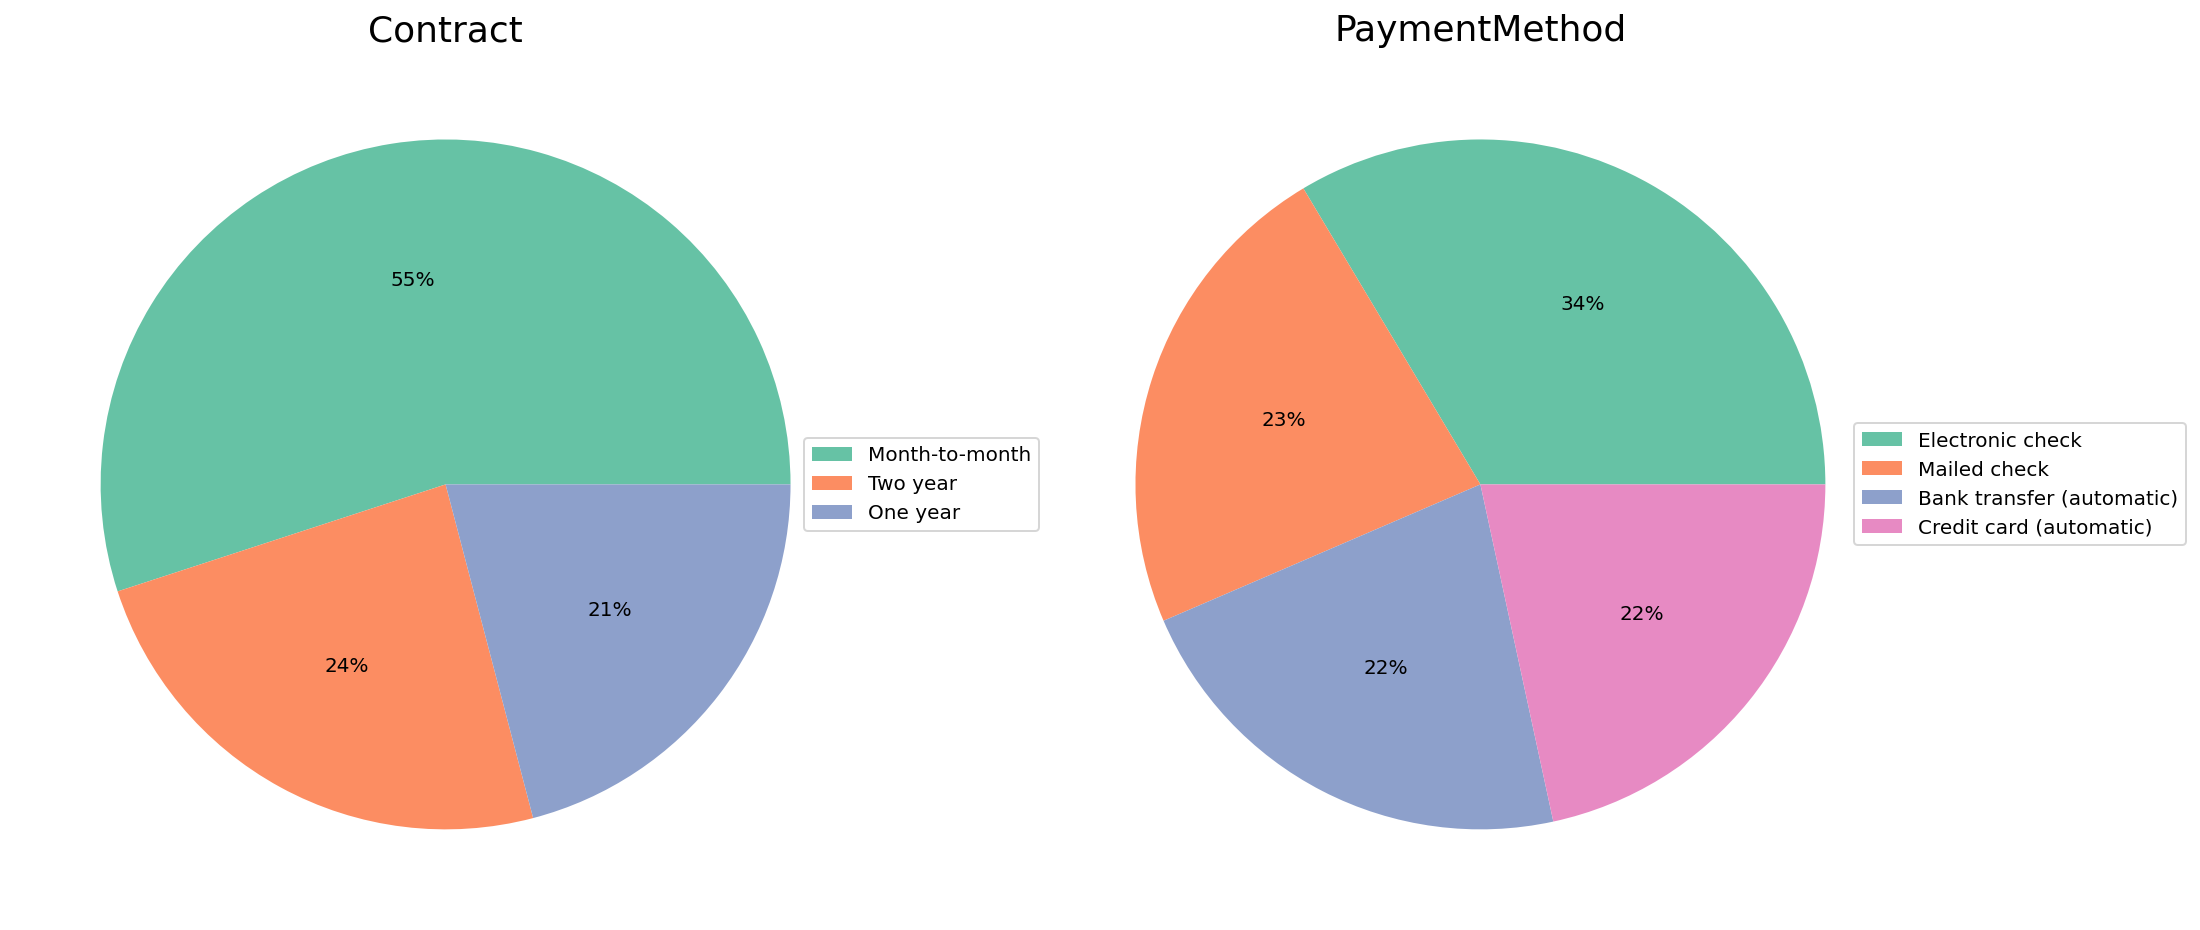

In [26]:
#Pie Chart for 'Contract' and 'Payment Method'
fig = plt.figure(figsize=(17,17),dpi=144)
ax1 = fig.add_subplot(121)

curr = df['Contract'].value_counts()
lbl = curr.to_dict().keys()
plt.title('Contract',fontsize=18)
colors = sns.color_palette("Set2")
ax1.pie(curr,colors = colors,autopct='%.0f%%')
ax1.legend(labels =lbl,loc='center right', bbox_to_anchor=(1.2, .5), fontsize=10 )


ax2 = fig.add_subplot(122)
curr1 = df['PaymentMethod'].value_counts()
other=df['PaymentMethod'].value_counts
lbl = curr1.to_dict().keys()
plt.title('PaymentMethod',fontsize=18)
colors = sns.color_palette("Set2")
ax2.pie(curr1,colors = colors,autopct='%.0f%%')
ax2.legend(labels =lbl,loc='center right', bbox_to_anchor=(1.33, .5), fontsize=10 )


plt.show()

#### Whether a customer has a landline phone service along with the internet service

<Figure size 2000x2000 with 0 Axes>

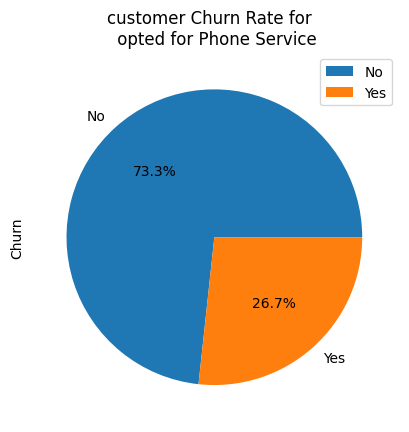

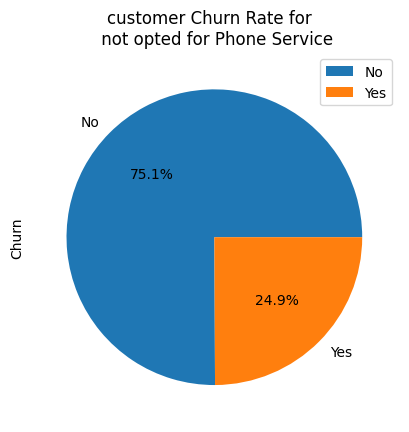

In [27]:
plt.figure(figsize=(20,20))
PS_Yes = pd.DataFrame(df[df['PhoneService'] == "Yes"]['Churn'].value_counts())
PS_Yes.plot.pie(subplots=True, labels = PS_Yes.index.values, autopct='%1.1f%%')
plt.title('customer Churn Rate for  \n opted for Phone Service')
plt.gca().set_aspect('equal')

PS_No = pd.DataFrame(df[df['PhoneService'] == "No"]['Churn'].value_counts())
PS_No.plot.pie(subplots=True, labels = PS_Yes.index.values, autopct='%1.1f%%')
plt.title('customer Churn Rate for  \n not opted for Phone Service')
plt.gca().set_aspect('equal')

plt.show() 

## Opting for phone service does not have a significant impact on churn rate.


# Contract

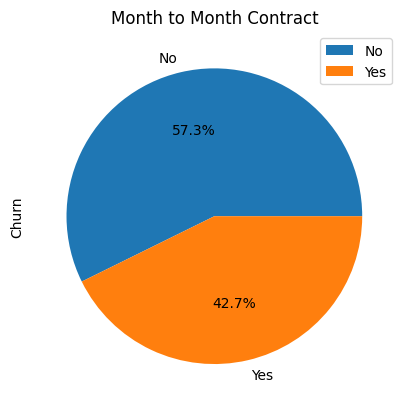

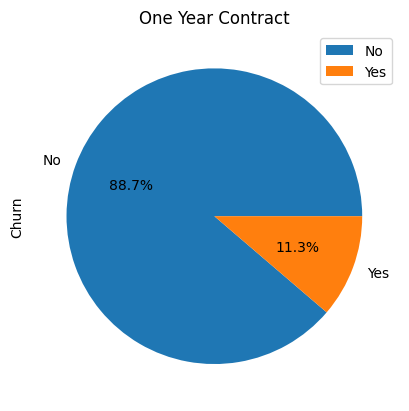

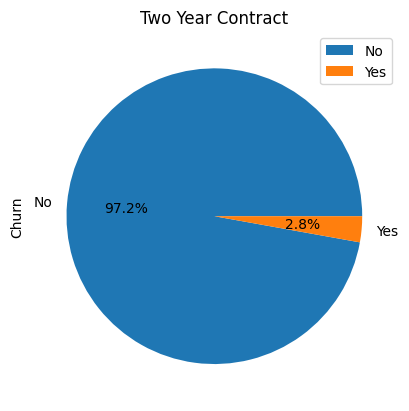

In [28]:
PCM2M = pd.DataFrame(df[df['Contract'] == "Month-to-month"]['Churn'].value_counts())
PCM2M.plot.pie(subplots=True, labels = PCM2M.index.values, autopct='%1.1f%%')
plt.title('Month to Month Contract')
plt.gca().set_aspect('equal')

PC1Y = pd.DataFrame(df[df['Contract'] == "One year"]['Churn'].value_counts())
PC1Y.plot.pie(subplots=True, labels = PC1Y.index.values, autopct='%1.1f%%')
plt.title('One Year Contract')
plt.gca().set_aspect('equal')

pc2y = pd.DataFrame(df[df['Contract'] == "Two year"]['Churn'].value_counts())
pc2y.plot.pie(subplots=True, labels = pc2y.index.values, autopct='%1.1f%%')
plt.title('Two Year Contract')
plt.gca().set_aspect('equal')

plt.show()
# Customers with One Year and Two year contract tends to Churn a lot lesser than month to month contract.

# Paperless Billing

<Figure size 2000x1000 with 0 Axes>

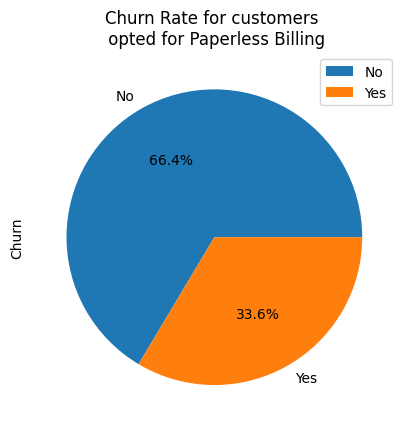

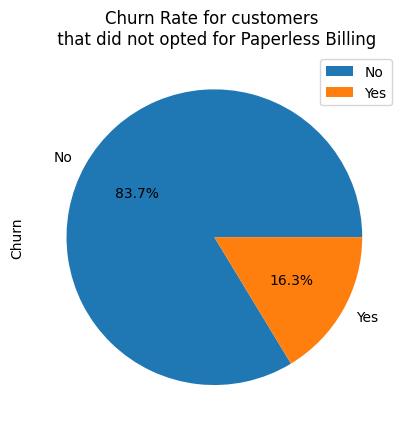

In [29]:
plt.figure(figsize=(20,10))
PPB_Yes = pd.DataFrame(df[df['PaperlessBilling'] == "Yes"]['Churn'].value_counts())
PPB_Yes.plot.pie(subplots=True, labels = PPB_Yes.index.values, autopct='%1.1f%%')
plt.title('Churn Rate for customers \n opted for Paperless Billing')
plt.gca().set_aspect('equal')


pie_PaperlessBilling_No = pd.DataFrame(df[df['PaperlessBilling'] == "No"]['Churn'].value_counts())
pie_PaperlessBilling_No.plot.pie(subplots=True, labels = pie_PaperlessBilling_No.index.values, autopct='%1.1f%%')
plt.title('Churn Rate for customers \n that did not opted for Paperless Billing')
plt.gca().set_aspect('equal')

plt.show()
## Churn Rate is higher for the customers who opted for paperless billing.

# Payment Method

<Figure size 1500x1000 with 0 Axes>

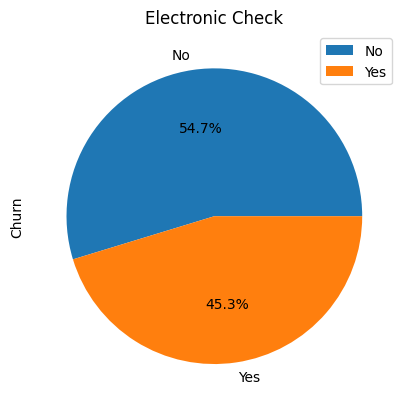

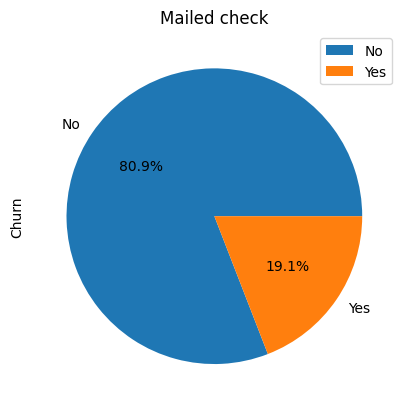

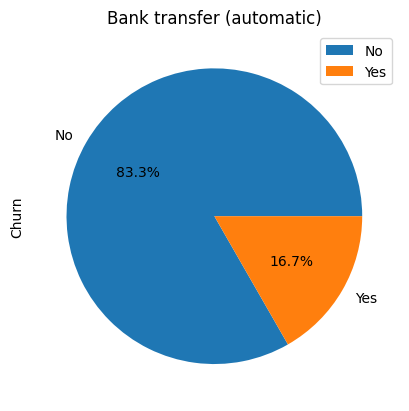

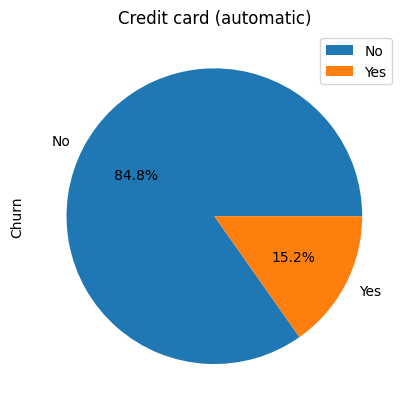

In [30]:
plt.figure(figsize=(15,10))
PPMEC = pd.DataFrame(df[df['PaymentMethod'] == "Electronic check"]['Churn'].value_counts())
PPMEC.plot.pie(subplots=True, labels = PPMEC.index.values, autopct='%1.1f%%')
plt.title('Electronic Check')
plt.gca().set_aspect('equal')

PPMMC = pd.DataFrame(df[df['PaymentMethod'] == "Mailed check"]['Churn'].value_counts())
PPMMC.plot.pie(subplots=True, labels = PPMMC.index.values, autopct='%1.1f%%')
plt.title('Mailed check')
plt.gca().set_aspect('equal')

PPMBTA = pd.DataFrame(df[df['PaymentMethod'] == "Bank transfer (automatic)"]['Churn'].value_counts())
PPMBTA.plot.pie(subplots=True, labels = PPMBTA.index.values, autopct='%1.1f%%')
plt.title('Bank transfer (automatic)')
plt.gca().set_aspect('equal')

PPMCCA = pd.DataFrame(df[df['PaymentMethod'] == "Credit card (automatic)"]['Churn'].value_counts())
PPMCCA.plot.pie(subplots=True, labels = PPMCCA.index.values, autopct='%1.1f%%')
plt.title('Credit card (automatic)')
plt.gca().set_aspect('equal')

plt.show()
## Customers with Electronic Check tends to churn more than other payment methods.

# Gender

<Figure size 1500x500 with 0 Axes>

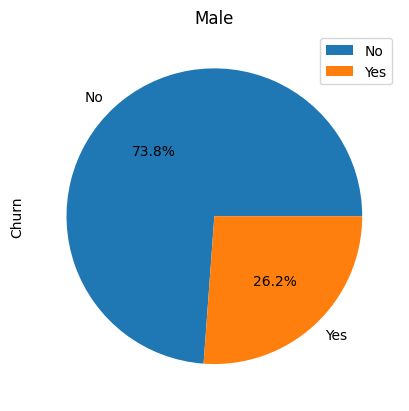

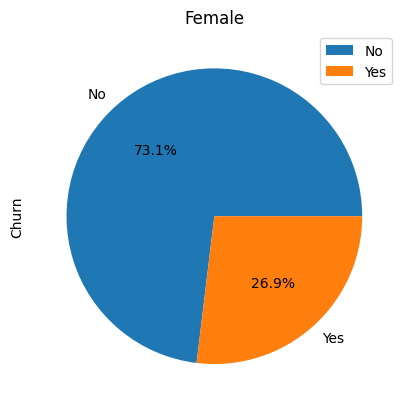

In [31]:
plt.figure(figsize=(15,5))
PGM = pd.DataFrame(df[df['gender'] == "Male"]['Churn'].value_counts())
PGM.plot.pie(subplots = True, labels = PGM.index.values, autopct='%1.1f%%')
plt.title('Male')
plt.gca().set_aspect('equal')

PGF = pd.DataFrame(df[df['gender'] == "Female"]['Churn'].value_counts())
PGF.plot.pie(subplots = True,  labels = PGF.index.values, autopct='%1.1f%%')
plt.title('Female')

plt.gca().set_aspect('equal')
plt.show() 
# There is no effect of Gender on Churn.

# Senior Citizen

<Figure size 1500x500 with 0 Axes>

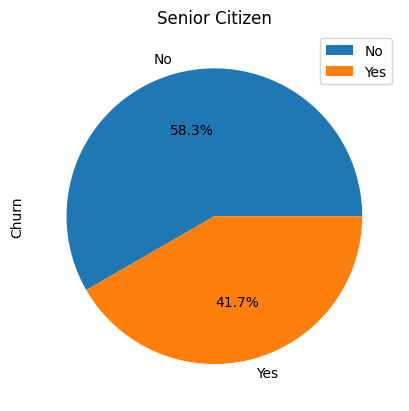

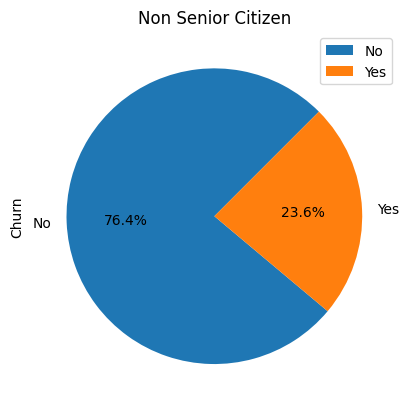

In [32]:
plt.figure(figsize=(15,5))
PSCY = pd.DataFrame(df[df['SeniorCitizen'] == 1]['Churn'].value_counts())
PSCY.plot.pie(subplots = True, labels = PSCY.index.values, autopct='%1.1f%%')
plt.title('Senior Citizen')
plt.gca().set_aspect('equal')

PSCN = pd.DataFrame(df[df['SeniorCitizen'] == 0]['Churn'].value_counts())
PSCN.plot.pie(subplots = True, labels = PSCN.index.values, autopct='%1.1f%%', startangle= 45)
plt.title('Non Senior Citizen')
plt.gca().set_aspect('equal')
plt.show() 
# Senior Citizens tends to churn more.

# Partner

<Figure size 1500x500 with 0 Axes>

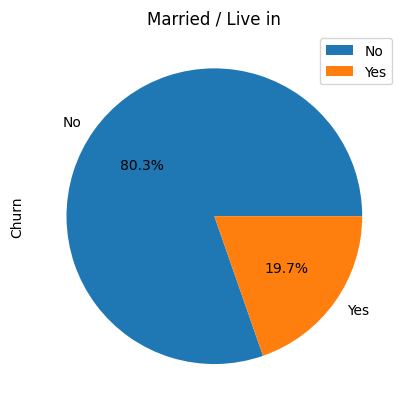

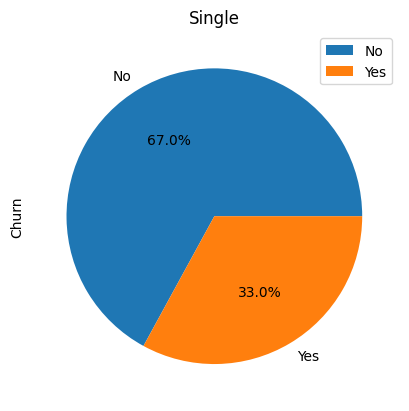

In [33]:
plt.figure(figsize=(15,5))
PPY = pd.DataFrame(df[df['Partner'] == 'Yes']['Churn'].value_counts())
PPY.plot.pie(subplots = True,  labels = PPY.index.values, autopct='%1.1f%%')
plt.title('Married / Live in')
plt.gca().set_aspect('equal')

PPN = pd.DataFrame(df[df['Partner'] == 'No']['Churn'].value_counts())
PPN.plot.pie(subplots = True,  labels = PPN.index.values, autopct='%1.1f%%')
plt.title('Single')

plt.gca().set_aspect('equal')
plt.show() 
# Single person tends to churn more than married/live-in customers.

# Dependents

<Figure size 1500x500 with 0 Axes>

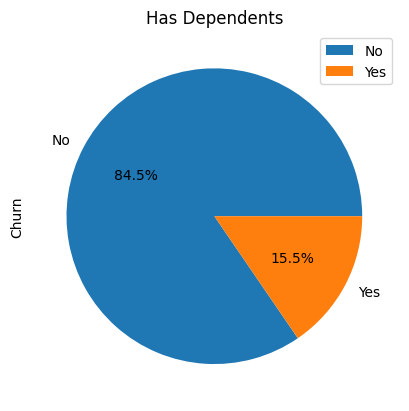

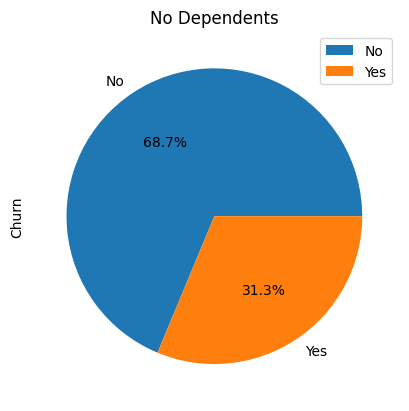

In [34]:
plt.figure(figsize=(15,5))
PDY = pd.DataFrame(df[df['Dependents'] == 'Yes']['Churn'].value_counts())
PDY.plot.pie(subplots = True,  labels = PDY.index.values, autopct='%1.1f%%')
plt.title('Has Dependents')
plt.gca().set_aspect('equal')

PDN = pd.DataFrame(df[df['Dependents'] == 'No']['Churn'].value_counts())
PDN.plot.pie(subplots = True,  labels = PDN.index.values, autopct='%1.1f%%')
plt.title('No Dependents')

plt.gca().set_aspect('equal')
plt.show() 
# Customers with no dependents tends to churn more.

# Multiple Lines
### Whether a customer has multiple lines of internet connectivity.

<Figure size 1500x500 with 0 Axes>

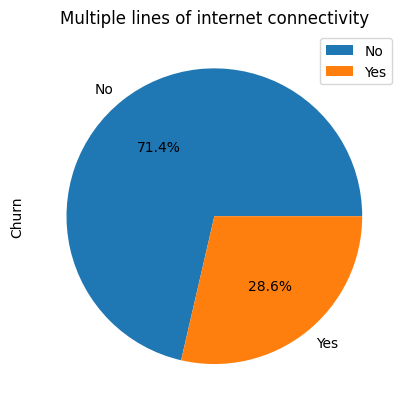

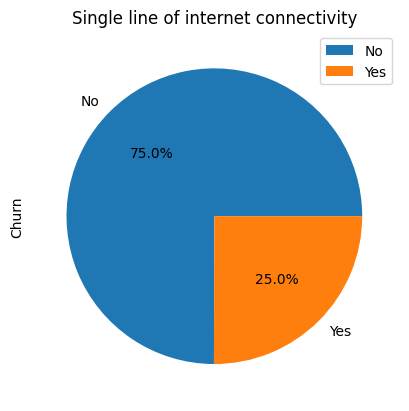

In [35]:
plt.figure(figsize=(15,5))
PMLY = pd.DataFrame(df[df['MultipleLines'] == 'Yes']['Churn'].value_counts())
PMLY.plot.pie(subplots = True,  labels = PMLY.index.values, autopct='%1.1f%%')
plt.title('Multiple lines of internet connectivity')
plt.gca().set_aspect('equal')

PMLN = pd.DataFrame(df[df['MultipleLines'] == 'No']['Churn'].value_counts())
PMLN.plot.pie(subplots = True,  labels = PMLN.index.values, autopct='%1.1f%%')
plt.title('Single line of internet connectivity')

plt.gca().set_aspect('equal')
plt.show() 
# Multiple lines of internet connectivity doesn't effect churn that much.

# Internet Service

<Figure size 1500x500 with 0 Axes>

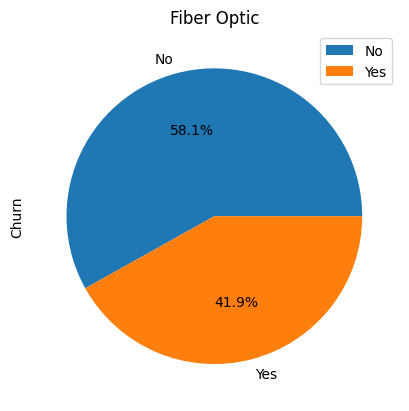

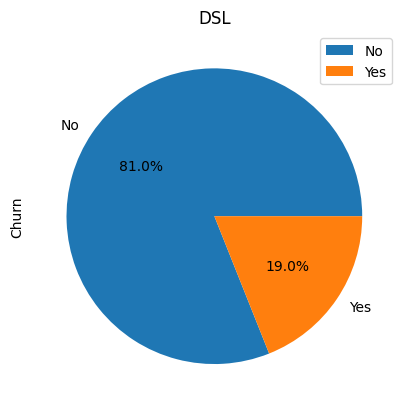

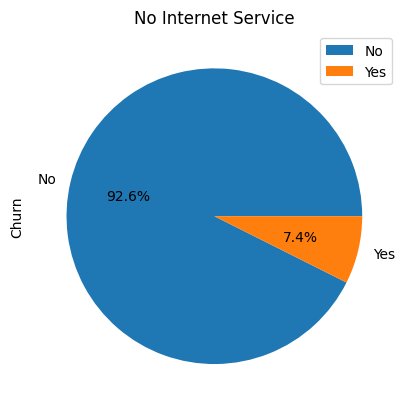

In [36]:
plt.figure(figsize=(15,5))
PISFO = pd.DataFrame(df[df['InternetService'] == "Fiber optic"]['Churn'].value_counts())
PISFO.plot.pie(subplots = True, labels = PISFO.index.values, autopct='%1.1f%%')
plt.title('Fiber Optic')
plt.gca().set_aspect('equal')

PISDSL = pd.DataFrame(df[df['InternetService'] == "DSL"]['Churn'].value_counts())
PISDSL.plot.pie(subplots = True, labels = PISDSL.index.values, autopct='%1.1f%%')
plt.title('DSL')
plt.gca().set_aspect('equal')

PISNO = pd.DataFrame(df[df['InternetService'] == "No"]['Churn'].value_counts())
PISNO.plot.pie(subplots = True, labels = PISNO.index.values, autopct='%1.1f%%')
plt.title('No Internet Service')
plt.gca().set_aspect('equal')

plt.show()
# Customers with Fiber Optic Connection churn the most whereas least probability of 
#churning for those with no internet service.

# Online Security

<Figure size 1500x500 with 0 Axes>

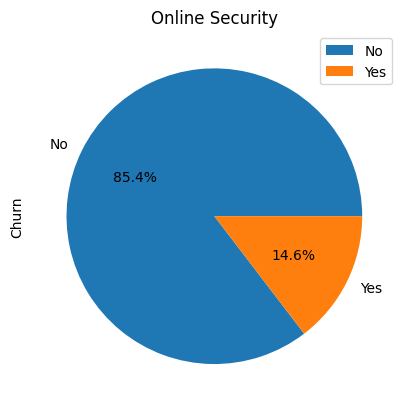

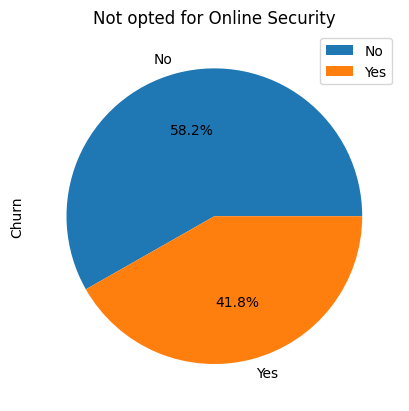

In [37]:
plt.figure(figsize=(15,5))
POSY = pd.DataFrame(df[df['OnlineSecurity'] == 'Yes']['Churn'].value_counts())
POSY.plot.pie(subplots = True,  labels = POSY.index.values, autopct='%1.1f%%')
plt.title('Online Security')
plt.gca().set_aspect('equal')

POSN = pd.DataFrame(df[df['OnlineSecurity'] == 'No']['Churn'].value_counts())
POSN.plot.pie(subplots = True, labels = POSN.index.values, autopct='%1.1f%%')
plt.title('Not opted for Online Security')
plt.gca().set_aspect('equal')
plt.show() 
# Customers opted for Online Security churn less than who have not opted.

# Online Backup

<Figure size 1500x500 with 0 Axes>

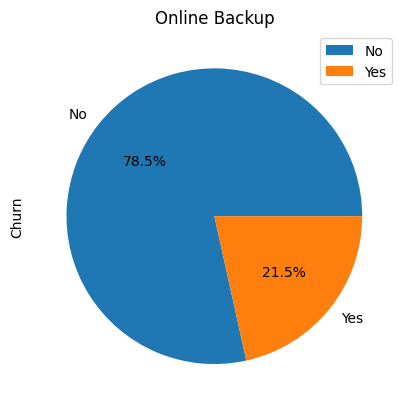

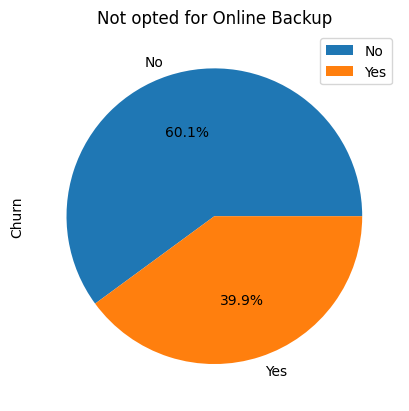

In [38]:
plt.figure(figsize=(15,5))
POBY = pd.DataFrame(df[df['OnlineBackup'] == 'Yes']['Churn'].value_counts())
POBY.plot.pie(subplots = True,  labels = POBY.index.values, autopct='%1.1f%%')
plt.title('Online Backup')
plt.gca().set_aspect('equal')

POBN = pd.DataFrame(df[df['OnlineBackup'] == 'No']['Churn'].value_counts())
POBN.plot.pie(subplots = True, labels = POBN.index.values, autopct='%1.1f%%')
plt.title('Not opted for Online Backup')
plt.gca().set_aspect('equal')

plt.show() 
# Customers opted for Online Backup churn less than who have not opted.

# Device Protection

<Figure size 1500x500 with 0 Axes>

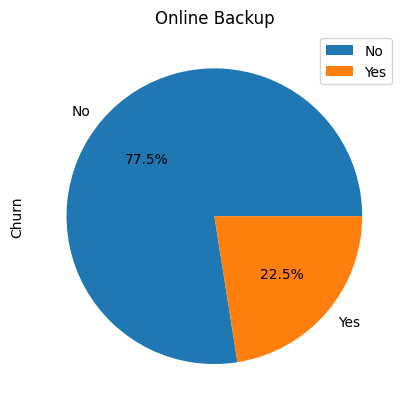

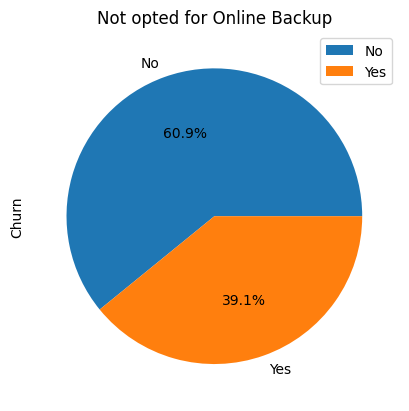

In [39]:
plt.figure(figsize=(15,5))

PDPY = pd.DataFrame(df[df['DeviceProtection'] == 'Yes']['Churn'].value_counts())
PDPY.plot.pie(subplots = True, labels = PDPY.index.values, autopct='%1.1f%%')
plt.title('Online Backup')
plt.gca().set_aspect('equal')

PDPN = pd.DataFrame(df[df['DeviceProtection'] == 'No']['Churn'].value_counts())
PDPN.plot.pie(subplots = True, labels = PDPN.index.values, autopct='%1.1f%%')
plt.title('Not opted for Online Backup')
plt.gca().set_aspect('equal')
plt.show() 
# Customers opted for Device Potection churn less than who have not opted.

# Tech Support

<Figure size 1500x500 with 0 Axes>

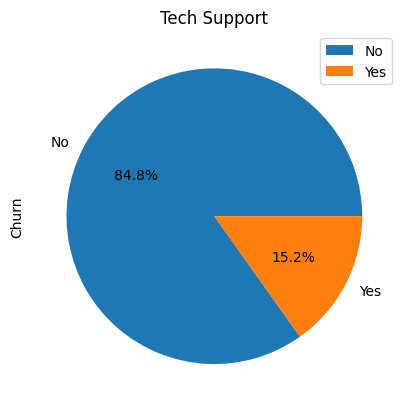

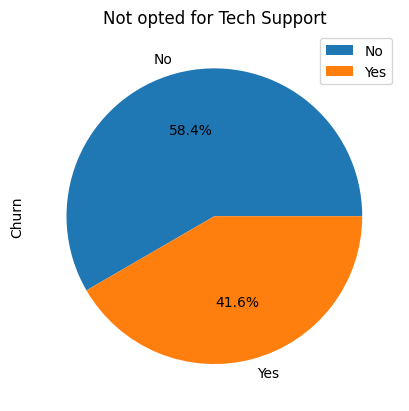

In [40]:
plt.figure(figsize=(15,5))
PTSY = pd.DataFrame(df[df['TechSupport'] == 'Yes']['Churn'].value_counts())
PTSY.plot.pie(subplots = True,labels = PTSY.index.values, autopct='%1.1f%%')
plt.title('Tech Support')
plt.gca().set_aspect('equal')

PTSN = pd.DataFrame(df[df['TechSupport'] == 'No']['Churn'].value_counts())
PTSN.plot.pie(subplots = True, labels = PTSN.index.values, autopct='%1.1f%%')
plt.title('Not opted for Tech Support')

plt.gca().set_aspect('equal')
plt.show()
# Customers opted for Tech Support churn less than who have not opted.

# Streaming TV

<Figure size 1500x500 with 0 Axes>

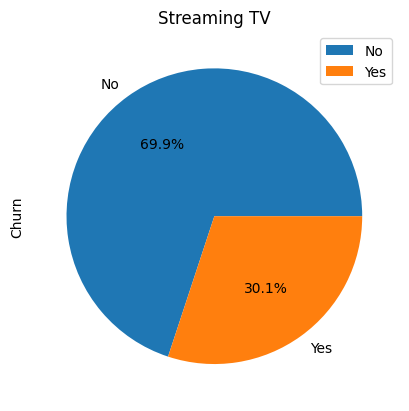

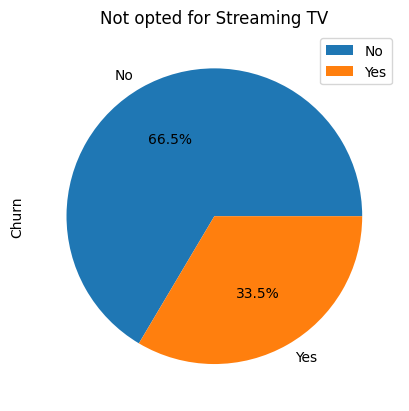

In [41]:
plt.figure(figsize=(15,5))
PSTY = pd.DataFrame(df[df['StreamingTV'] == 'Yes']['Churn'].value_counts())
PSTY.plot.pie(subplots = True, labels = PSTY.index.values, autopct='%1.1f%%')
plt.title('Streaming TV')
plt.gca().set_aspect('equal')

PSTN = pd.DataFrame(df[df['StreamingTV'] == 'No']['Churn'].value_counts())
PSTN.plot.pie(subplots = True,labels = PSTN.index.values, autopct='%1.1f%%')
plt.title('Not opted for Streaming TV')
plt.gca().set_aspect('equal')

plt.show() 
# Streaming TV doesn't make such impact on churning.

# Streaming Movies

<Figure size 1500x500 with 0 Axes>

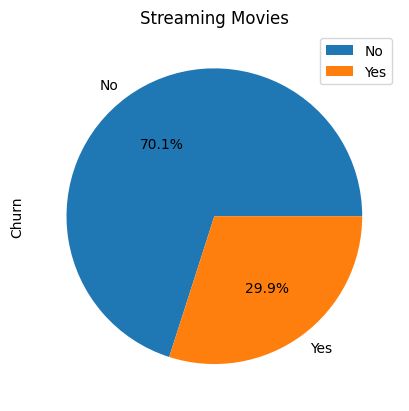

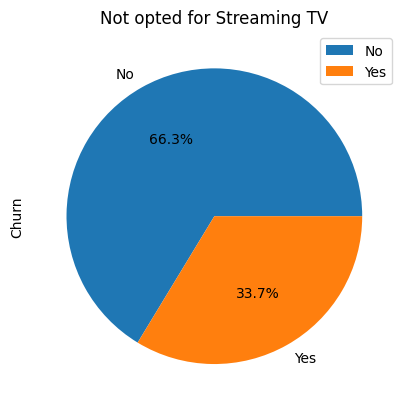

In [42]:
plt.figure(figsize=(15,5))
PSMY = pd.DataFrame(df[df['StreamingMovies'] == 'Yes']['Churn'].value_counts())
PSMY.plot.pie(subplots = True, labels = PSMY.index.values, autopct='%1.1f%%')
plt.title('Streaming Movies')
plt.gca().set_aspect('equal')

PSMN = pd.DataFrame(df[df['StreamingMovies'] == 'No']['Churn'].value_counts())
PSMN.plot.pie(subplots = True, labels = PSMN.index.values, autopct='%1.1f%%')
plt.title('Not opted for Streaming TV')
plt.gca().set_aspect('equal')

plt.show()
# Streaming Movies doesn't make such impact on churning.

# ML Models and Evaluations

In [43]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

C:\Users\KIIT\AppData\Local\Temp\ipykernel_9948\3800567520.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


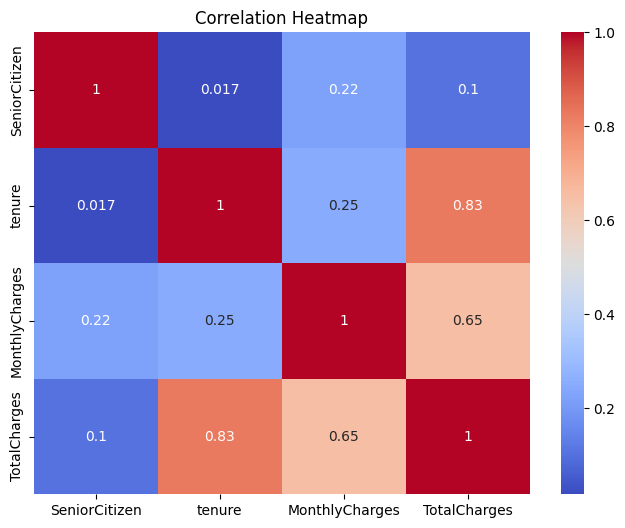

In [44]:
#Creating Heatmap to show significant features
correlation_matrix = df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

## Try to identify important or relevant columns for feature extraction

In [45]:
corr_matrix = df.corr().abs()
high_corr_var = np.where(corr_matrix > 0.6)
high_corr_var = [(corr_matrix.columns[x], corr_matrix.columns[y]) for x, y in zip(*high_corr_var) if x != y and x < y]
print(high_corr_var)

[('tenure', 'TotalCharges'), ('MonthlyCharges', 'TotalCharges')]


C:\Users\KIIT\AppData\Local\Temp\ipykernel_9948\1056558080.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr().abs()


In [46]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [47]:
# List of variables to map
varlist=[['PhoneService', 'PaperlessBilling', 'Churn', 'Partner', 'Dependents']]

In [48]:
#Converting some binary valued columns to from(Yes/No) to (0/1)
df['PhoneService'].replace(to_replace='Yes', value=1, inplace=True)
df['PhoneService'].replace(to_replace='No',  value=0, inplace=True)
df['PaperlessBilling'].replace(to_replace='Yes', value=1, inplace=True)
df['PaperlessBilling'].replace(to_replace='No',  value=0, inplace=True)
df['Churn'].replace(to_replace='Yes', value=1, inplace=True)
df['Churn'].replace(to_replace='No',  value=0, inplace=True)
df['Partner'].replace(to_replace='Yes', value=1, inplace=True)
df['Partner'].replace(to_replace='No',  value=0, inplace=True)
df['Dependents'].replace(to_replace='Yes', value=1, inplace=True)
df['Dependents'].replace(to_replace='No',  value=0, inplace=True)

In [49]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,1,0,1,0,No phone service,DSL,No,...,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,0,0,34,1,No,DSL,Yes,...,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0,0,0,2,1,No,DSL,Yes,...,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,0,0,45,0,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,0,0,2,1,No,Fiber optic,No,...,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1


In [50]:
# Creating a dummy variable for some of the categorical variables and dropping the first ones.
DY1 = pd.get_dummies(df[['Contract', 'PaymentMethod', 'gender', 'InternetService']], drop_first=True)

# Adding the results to the actual df
df = pd.concat([df, DY1], axis=1)

In [51]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TotalCharges,Churn,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,InternetService_Fiber optic,InternetService_No
0,7590-VHVEG,Female,0,1,0,1,0,No phone service,DSL,No,...,29.85,0,0,0,0,1,0,0,0,0
1,5575-GNVDE,Male,0,0,0,34,1,No,DSL,Yes,...,1889.50,0,1,0,0,0,1,1,0,0
2,3668-QPYBK,Male,0,0,0,2,1,No,DSL,Yes,...,108.15,1,0,0,0,0,1,1,0,0
3,7795-CFOCW,Male,0,0,0,45,0,No phone service,DSL,Yes,...,1840.75,0,1,0,0,0,0,1,0,0
4,9237-HQITU,Female,0,0,0,2,1,No,Fiber optic,No,...,151.65,1,0,0,0,1,0,0,1,0


In [52]:
# Creating dummy variables for the remaining categorical variables and dropping the level with big names.

# Creating dummy variables for the variable 'MultipleLines'
ml = pd.get_dummies(df['MultipleLines'], prefix='MultipleLines')
# Dropping MultipleLines_No phone service column
ml1 = ml.drop(['MultipleLines_No phone service'], 1)
#Adding the results to the master dataframe
df = pd.concat([df,ml1], axis=1)

# Creating dummy variables for the variable 'OnlineSecurity'.
os = pd.get_dummies(df['OnlineSecurity'], prefix='OnlineSecurity')
os1 = os.drop(['OnlineSecurity_No internet service'], 1)
# Adding the results to the master dataframe
df = pd.concat([df,os1], axis=1)

# Creating dummy variables for the variable 'OnlineBackup'.
ob = pd.get_dummies(df['OnlineBackup'], prefix='OnlineBackup')
ob1 = ob.drop(['OnlineBackup_No internet service'], 1)
# Adding the results to the master dataframe
df = pd.concat([df,ob1], axis=1)

# Creating dummy variables for the variable 'DeviceProtection'. 
dp = pd.get_dummies(df['DeviceProtection'], prefix='DeviceProtection')
dp1 = dp.drop(['DeviceProtection_No internet service'], 1)
# Adding the results to the master dataframe
df = pd.concat([df,dp1], axis=1)

# Creating dummy variables for the variable 'TechSupport'. 
ts = pd.get_dummies(df['TechSupport'], prefix='TechSupport')
ts1 = ts.drop(['TechSupport_No internet service'], 1)
# Adding the results to the master dataframe
df = pd.concat([df,ts1], axis=1)

# Creating dummy variables for the variable 'StreamingTV'.
st =pd.get_dummies(df['StreamingTV'], prefix='StreamingTV')
st1 = st.drop(['StreamingTV_No internet service'], 1)
# Adding the results to the master dataframe
df = pd.concat([df,st1], axis=1)

# Creating dummy variables for the variable 'StreamingMovies'. 
sm = pd.get_dummies(df['StreamingMovies'], prefix='StreamingMovies')
sm1 = sm.drop(['StreamingMovies_No internet service'], 1)
# Adding the results to the master dataframe
df = pd.concat([df,sm1], axis=1)
df.head()

C:\Users\KIIT\AppData\Local\Temp\ipykernel_9948\3344011800.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  ml1 = ml.drop(['MultipleLines_No phone service'], 1)
C:\Users\KIIT\AppData\Local\Temp\ipykernel_9948\3344011800.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  os1 = os.drop(['OnlineSecurity_No internet service'], 1)
C:\Users\KIIT\AppData\Local\Temp\ipykernel_9948\3344011800.py:18: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  ob1 = ob.drop(['OnlineBackup_No internet service'], 1)
C:\Users\KIIT\AppData\Local\Temp\ipykernel_9948\3344011800.py:24: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  dp1 = dp.drop(['DeviceProtection_No 

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
0,7590-VHVEG,Female,0,1,0,1,0,No phone service,DSL,No,...,0,1,1,0,1,0,1,0,1,0
1,5575-GNVDE,Male,0,0,0,34,1,No,DSL,Yes,...,1,0,0,1,1,0,1,0,1,0
2,3668-QPYBK,Male,0,0,0,2,1,No,DSL,Yes,...,0,1,1,0,1,0,1,0,1,0
3,7795-CFOCW,Male,0,0,0,45,0,No phone service,DSL,Yes,...,1,0,0,1,0,1,1,0,1,0
4,9237-HQITU,Female,0,0,0,2,1,No,Fiber optic,No,...,1,0,1,0,1,0,1,0,1,0


In [53]:
# We have created dummies for the below variables, so we can drop them
df = df.drop(['Contract','PaymentMethod','gender','MultipleLines','InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies'], 1)
df.head()

C:\Users\KIIT\AppData\Local\Temp\ipykernel_9948\3934896464.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop(['Contract','PaymentMethod','gender','MultipleLines','InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',


,customerID,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
0,7590-VHVEG,0,1,0,1,0,1,29.85,29.85,0,...,0,1,1,0,1,0,1,0,1,0
1,5575-GNVDE,0,0,0,34,1,0,56.95,1889.50,0,...,1,0,0,1,1,0,1,0,1,0
2,3668-QPYBK,0,0,0,2,1,1,53.85,108.15,1,...,0,1,1,0,1,0,1,0,1,0
3,7795-CFOCW,0,0,0,45,0,0,42.30,1840.75,0,...,1,0,0,1,0,1,1,0,1,0
4,9237-HQITU,0,0,0,2,1,1,70.70,151.65,1,...,1,0,1,0,1,0,1,0,1,0


In [54]:
# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
df.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,Contract_One year,...,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,...,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,0.483033,0.299588,32.371149,0.903166,0.592219,64.761692,2281.916928,0.265370,0.209144,...,0.438450,0.344881,0.439443,0.343888,0.493114,0.290217,0.398978,0.384353,0.395428,0.387903
std,0.368612,0.499748,0.458110,24.559481,0.295752,0.491457,30.090047,2265.270398,0.441561,0.406726,...,0.496232,0.475363,0.496355,0.475038,0.499988,0.453895,0.489723,0.486477,0.488977,0.487307
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,35.500000,402.225000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,70.350000,1397.475000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,89.850000,3786.600000,1.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
90%,1.000000,1.000000,1.000000,69.000000,1.000000,1.000000,102.600000,5973.690000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
95%,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,107.400000,6921.025000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
99%,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,114.729000,8039.256000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [55]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.feature_selection import RFE
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import RepeatedStratifiedKFold

In [56]:
# Putting variables(feature) to X (except 'Churn' and 'customerID')
x = df.drop(['Churn','customerID'], axis=1)
x.head()


,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Contract_One year,Contract_Two year,...,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
0,0,1,0,1,0,1,29.85,29.85,0,0,...,0,1,1,0,1,0,1,0,1,0
1,0,0,0,34,1,0,56.95,1889.50,1,0,...,1,0,0,1,1,0,1,0,1,0
2,0,0,0,2,1,1,53.85,108.15,0,0,...,0,1,1,0,1,0,1,0,1,0
3,0,0,0,45,0,0,42.30,1840.75,1,0,...,1,0,0,1,0,1,1,0,1,0
4,0,0,0,2,1,1,70.70,151.65,0,0,...,1,0,1,0,1,0,1,0,1,0


In [57]:
# Putting variable(response) to y
y = df['Churn']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

In [59]:
# Splitting the data into train and test
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.3, random_state=100)

In [79]:
#Saler Transformation
scaler = StandardScaler()
x_train[['tenure','MonthlyCharges','TotalCharges']] = scaler.fit_transform(x_train[['tenure','MonthlyCharges','TotalCharges']])
x_train.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Contract_One year,Contract_Two year,...,gender_Male,InternetService_Fiber optic,InternetService_No,MultipleLines_Yes,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes
877,0,0,1,0.754422,0,0,-0.145568,0.350018,1,0,...,0,0,0,0,1,0,1,1,1,1
5792,1,0,0,-0.710751,1,1,1.051796,-0.379542,0,0,...,0,1,0,0,1,0,1,1,0,1
5334,0,1,1,0.673024,1,1,1.437668,1.329780,0,1,...,0,1,0,1,0,1,1,1,1,1
878,0,0,0,1.120716,1,0,0.006794,0.775531,1,0,...,0,0,0,1,1,0,1,1,0,0
6578,0,0,1,-0.914247,1,0,0.298268,-0.703794,1,0,...,0,0,0,1,1,0,1,1,0,1


In [80]:
churn = (sum(df['Churn'])/len(df['Churn'].index))*100
print(f"Churn rate : {churn}%")

Churn rate : 26.536987079369588%


C:\Users\KIIT\AppData\Local\Temp\ipykernel_9948\4016170948.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix=df.corr()


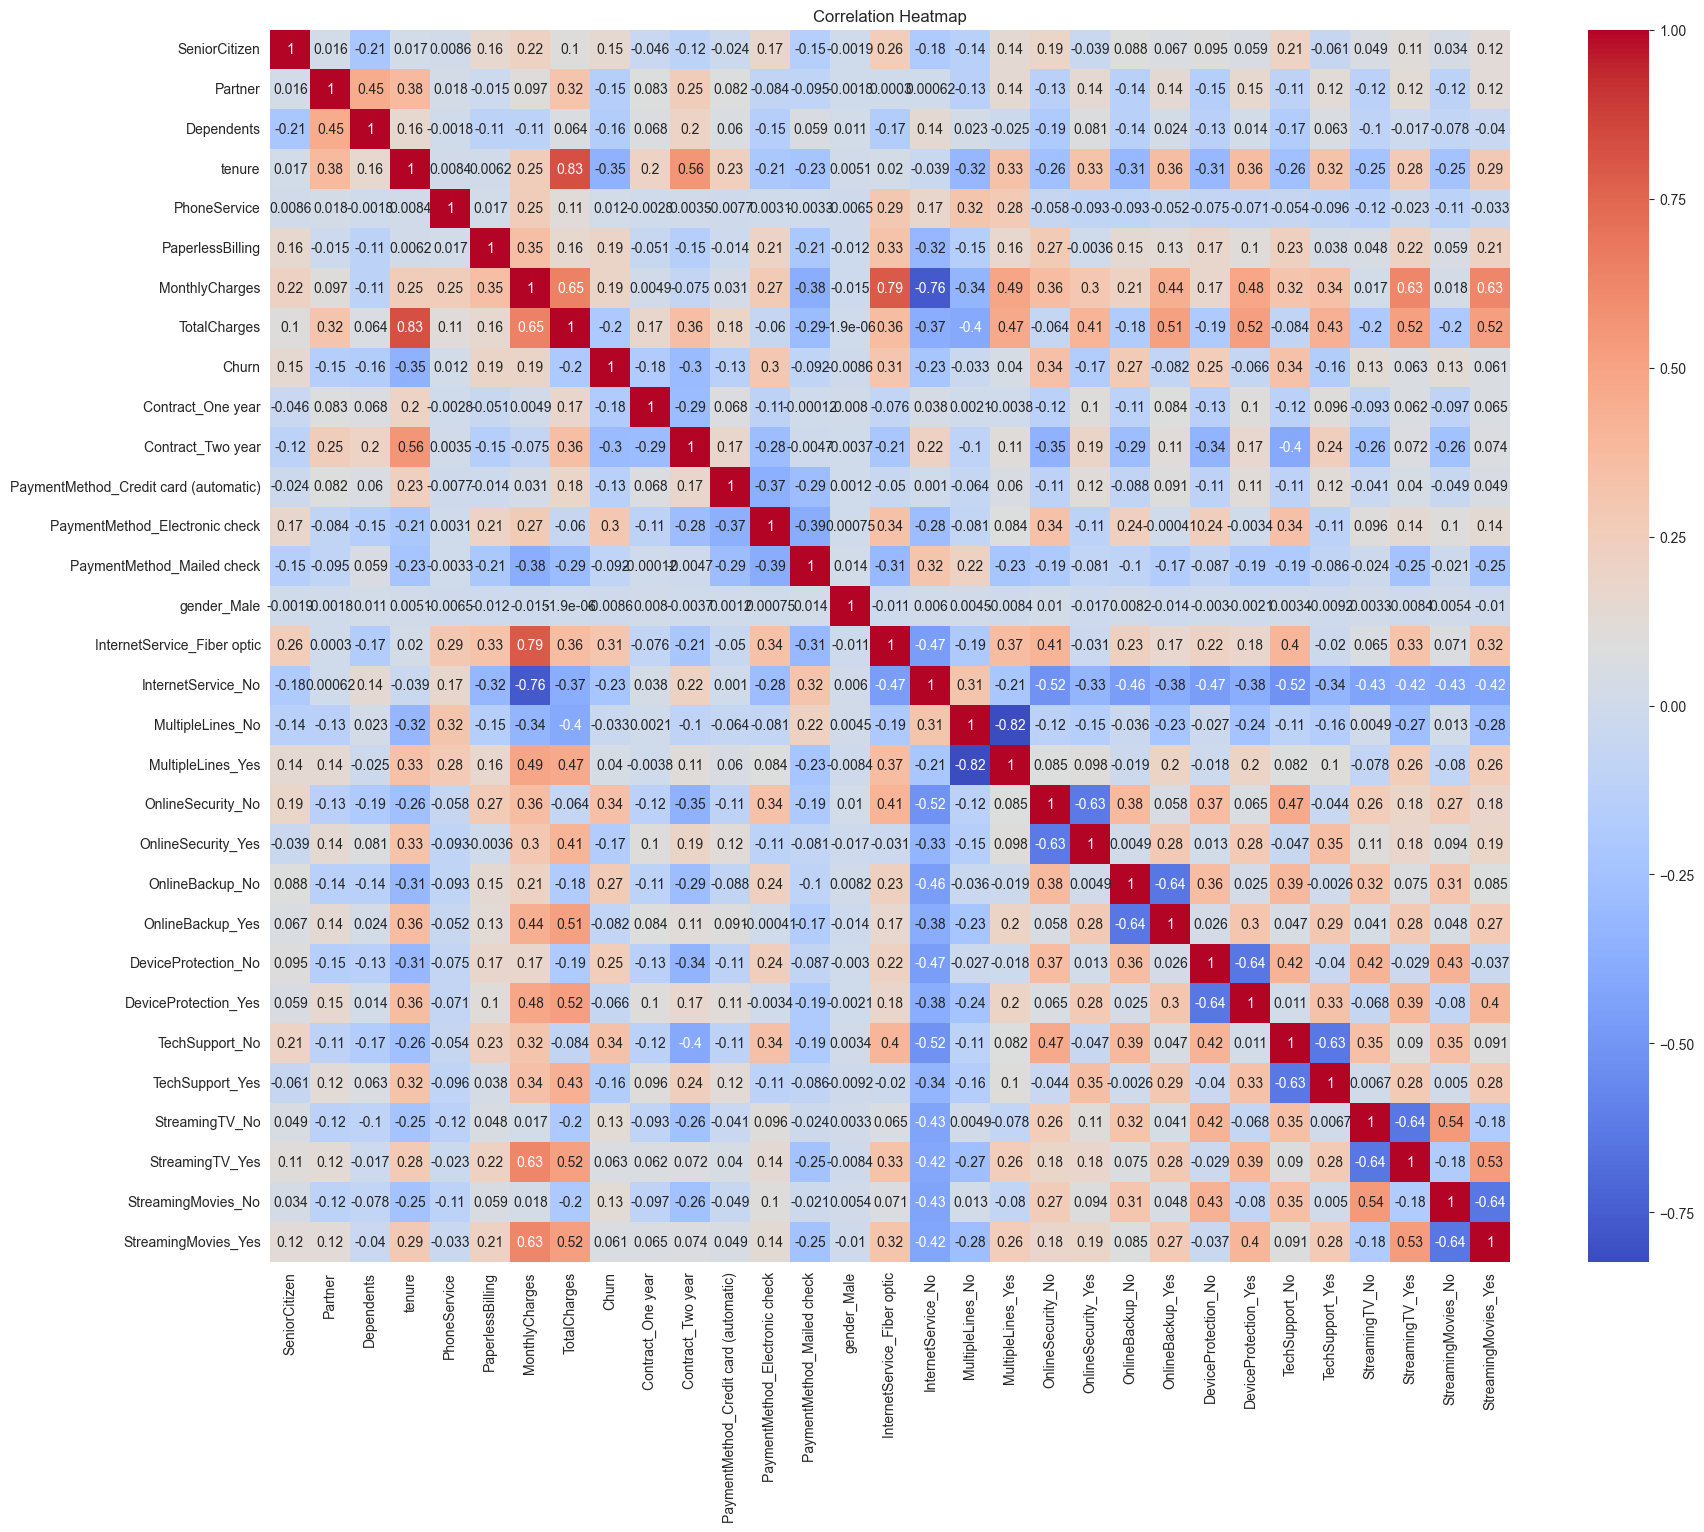

In [81]:
#Heatmap of correlation
corr_matrix=df.corr()
plt.figure(figsize = (20,16))       
sns.heatmap(corr_matrix,annot = True,cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [82]:
#Dropping highly correlated dummy variables
x_test = x_test.drop(['MultipleLines_No','OnlineSecurity_No','OnlineBackup_No','DeviceProtection_No','TechSupport_No',
                       'StreamingTV_No','StreamingMovies_No'], 1)
x_train = x_train.drop(['MultipleLines_No','OnlineSecurity_No','OnlineBackup_No','DeviceProtection_No','TechSupport_No',
                         'StreamingTV_No','StreamingMovies_No'], 1)

C:\Users\KIIT\AppData\Local\Temp\ipykernel_9948\4173153295.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x_test = x_test.drop(['MultipleLines_No','OnlineSecurity_No','OnlineBackup_No','DeviceProtection_No','TechSupport_No',


KeyError: "['MultipleLines_No', 'OnlineSecurity_No', 'OnlineBackup_No', 'DeviceProtection_No', 'TechSupport_No', 'StreamingTV_No', 'StreamingMovies_No'] not found in axis"

C:\Users\KIIT\AppData\Local\Temp\ipykernel_9948\478126069.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


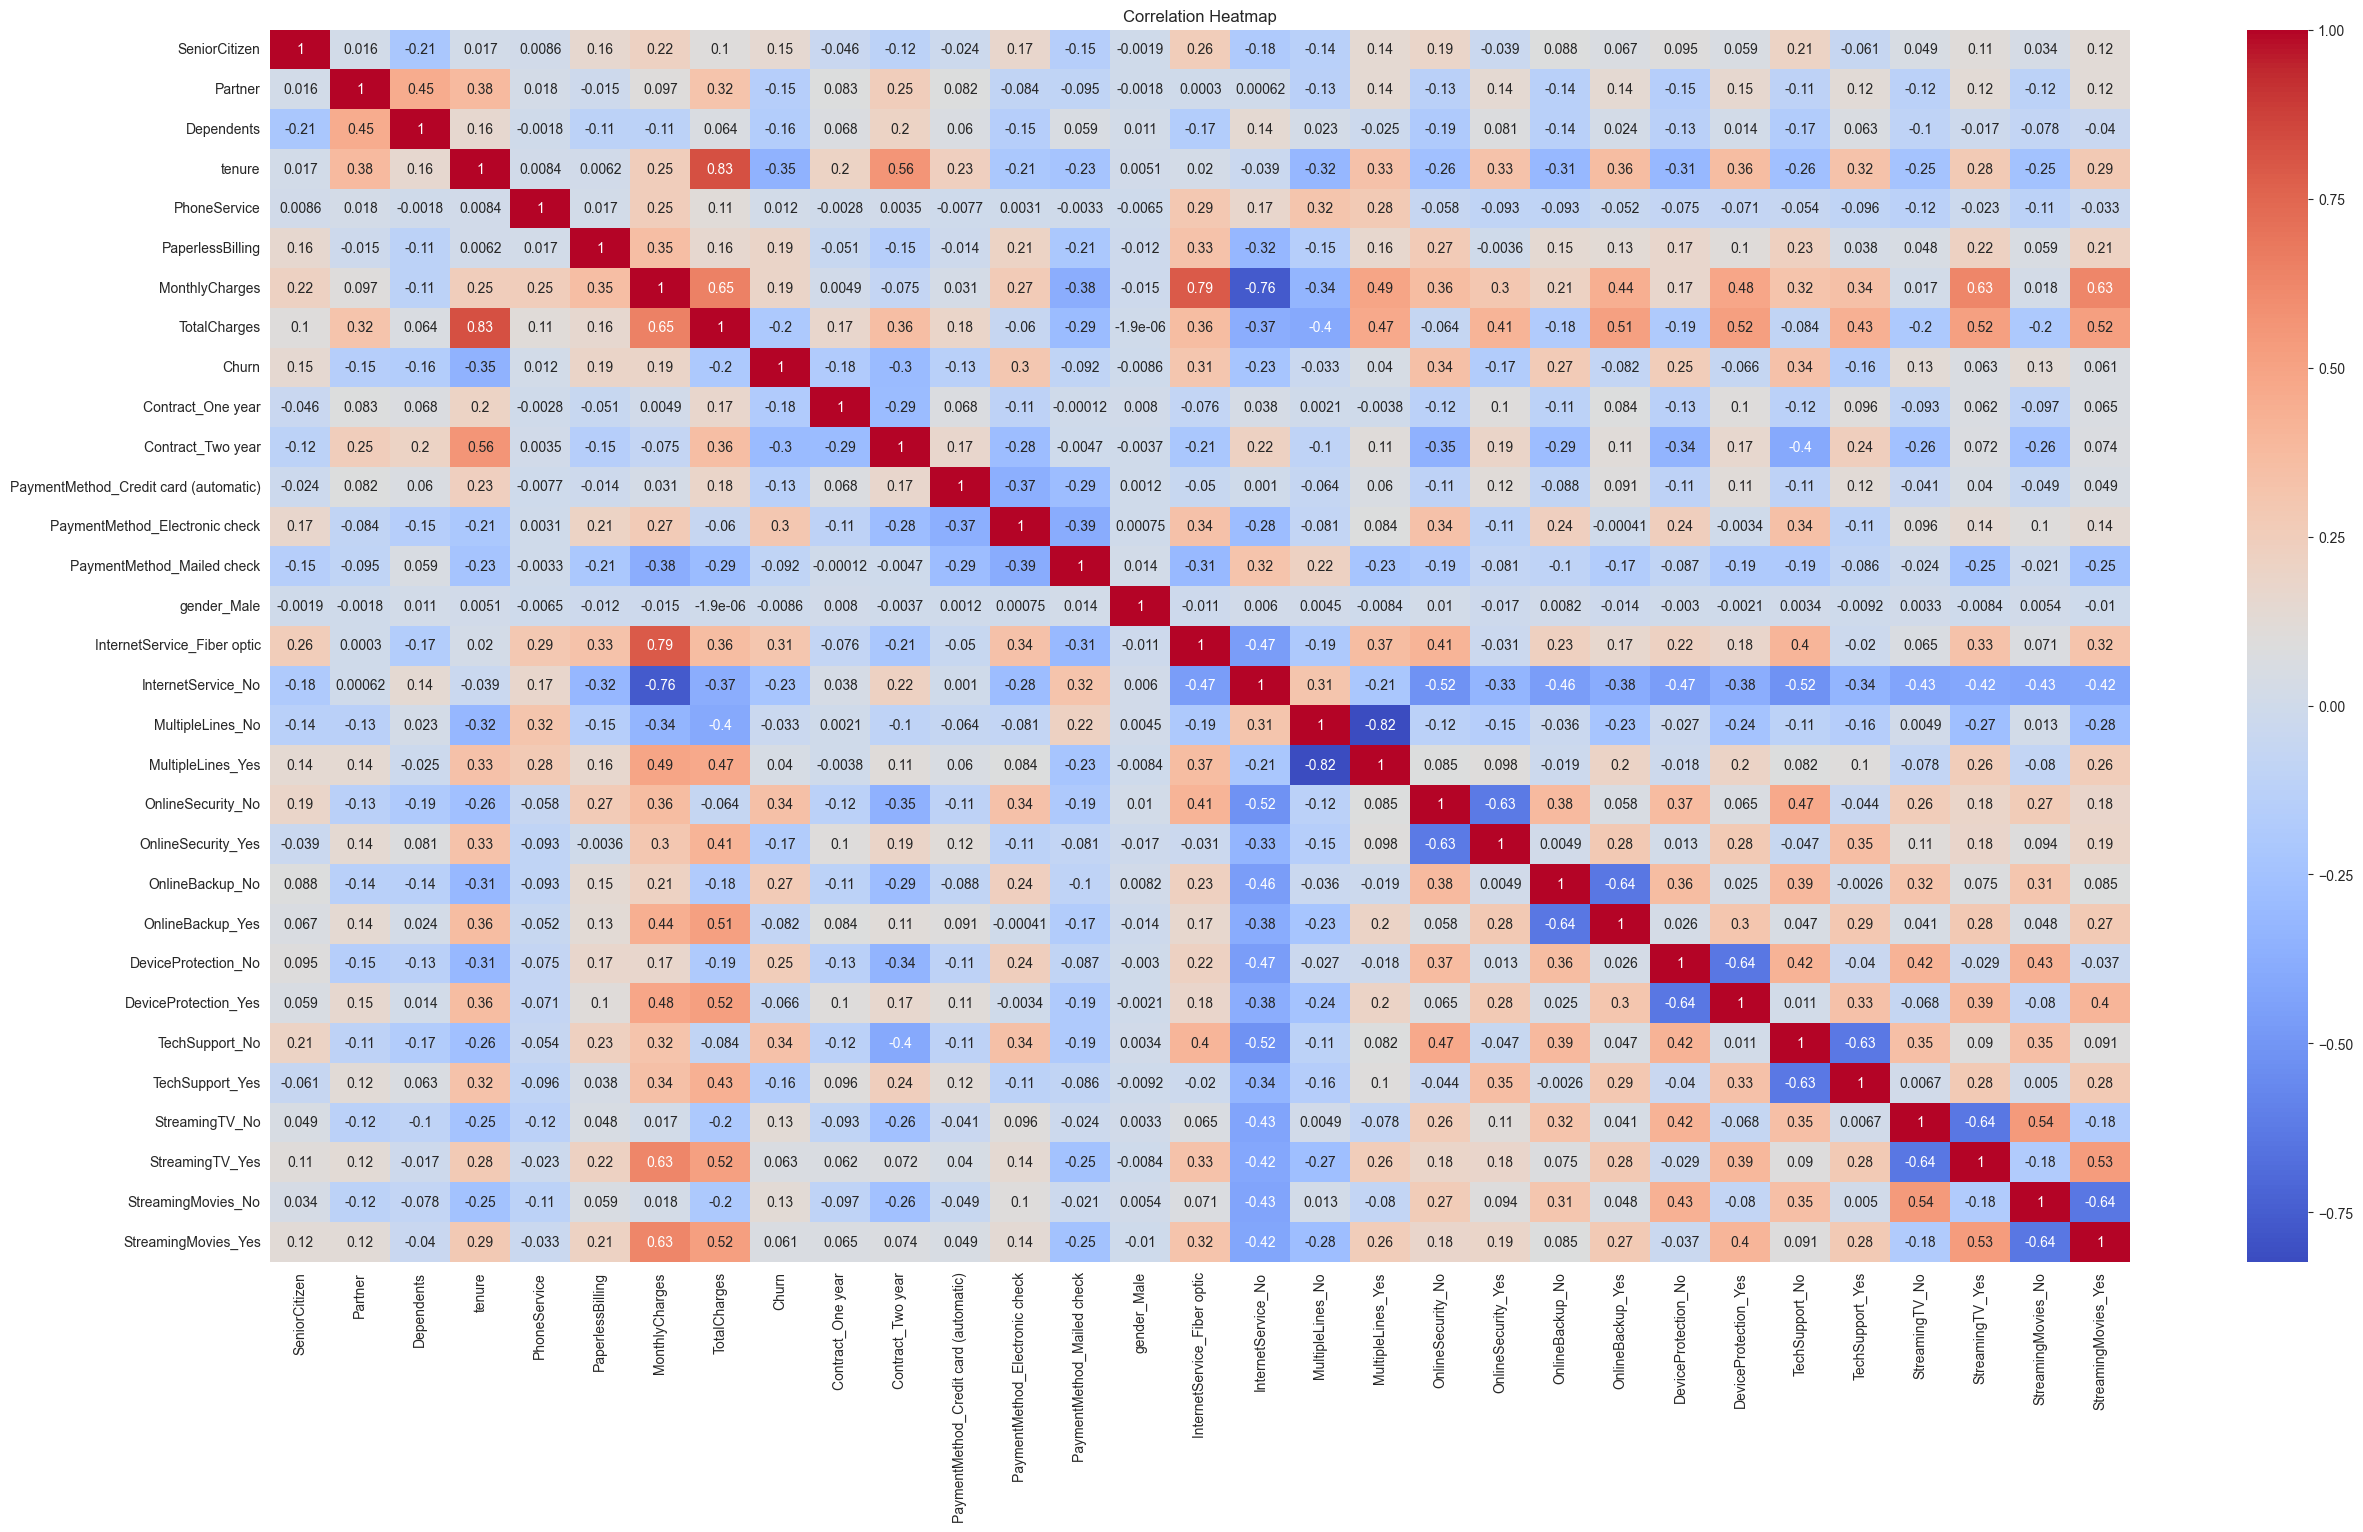

In [86]:
#After dropping highly correlated variables cheaking heatmap once again
correlation_matrix = df.corr()
plt.figure(figsize=(30,16))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

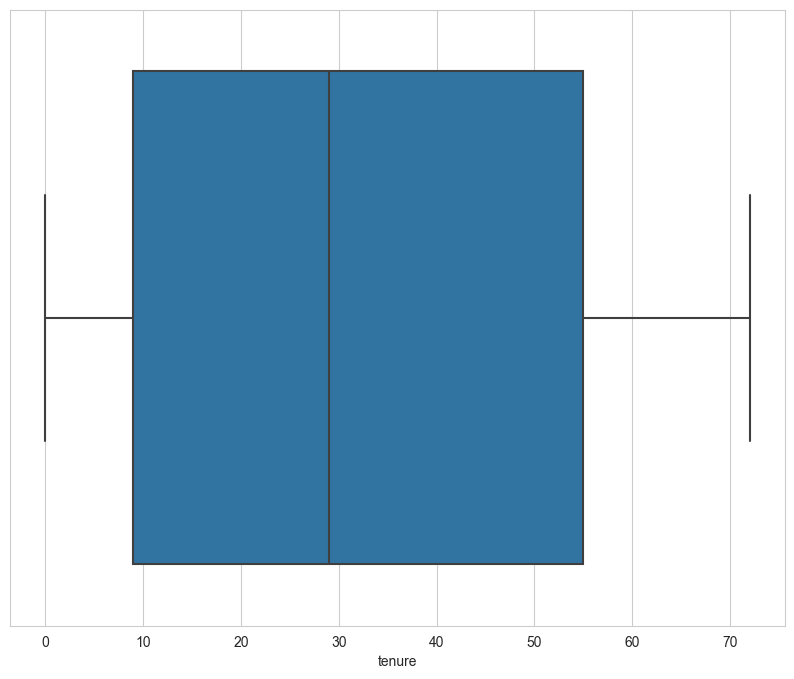

In [87]:
#Finding outlairs using boxplot
sns.set_style("whitegrid")
plt.figure(figsize=(10,8))
sns.boxplot(x=df["tenure"])
plt.show()#For first 15 data

In [88]:
MSE_Score = []
RMSE_Score=[]
R2_Score = []
Algorithm = []

In [91]:
Algorithm.append('Logistic Regression')
logistic_reg = LogisticRegression()
lrg = RFE(logistic_reg,step=15)
lrg_fitted = lrg.fit(x_train, y_train)
predicted=lrg_fitted.predict(x_test)

In [92]:
lrg_fitted.support_

array([ True, False, False,  True,  True,  True, False,  True,  True,
        True, False, False, False, False,  True,  True,  True, False,
       False, False,  True, False, False])

In [93]:
# Appending the Scores For Visualisation at a Later Part
MSE=mean_squared_error(y_test, predicted)
MSE_Score.append(MSE)
RMSE_Score.append(np.sqrt(MSE))
R2_Score.append(r2_score(y_test, predicted))
for i in Algorithm, MSE_Score,RMSE_Score, R2_Score:
    print(i,end=',')

['Logistic Regression', 'Logistic Regression'],[0.2096545196403218],[0.4578804643575895],[-0.06904621049289528],

In [94]:
lrg_fitted.ranking_

array([1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 1, 2,
       2])

In [95]:

Comparison = pd.DataFrame(list(zip(x_train.columns, lrg_fitted.support_, lrg_fitted.ranking_)), columns = ['Columns', 'Support', 'Ranking'])
Comparison

,Columns,Support,Ranking
0,SeniorCitizen,True,1
1,Partner,False,2
2,Dependents,False,2
3,tenure,True,1
4,PhoneService,True,1
5,PaperlessBilling,True,1
6,MonthlyCharges,False,2
7,TotalCharges,True,1
8,Contract_One year,True,1
9,Contract_Two year,True,1


In [96]:
col = x_train.columns[lrg_fitted.support_]
x_train.columns[~lrg_fitted.support_]

Index(['Partner', 'Dependents', 'MonthlyCharges',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'gender_Male', 'OnlineSecurity_Yes', 'OnlineBackup_Yes',
       'DeviceProtection_Yes', 'StreamingTV_Yes', 'StreamingMovies_Yes'],
      dtype='object')

In [97]:
logm1 = sm.GLM(y_train,(sm.add_constant(x_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4930
Model:                            GLM   Df Residuals:                     4906
Model Family:                Binomial   Df Model:                           23
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2008.4
Date:                Wed, 28 Jun 2023   Deviance:                       4016.7
Time:                        02:33:23   Pearson chi2:                 5.74e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2884
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -2.9916      1.531     -1.954      0.051      -5.993       0.010
SeniorCitizen                             0.2945      0.103      2.873      0.004       0.094       0.495
Partner                                   0.0264      0.094      0.281      0.778      -0.158       0.211
Dependents                               -0.2223      0.108     -2.065      0.039      -0.433      -0.011
tenure                                   -1.3206      0.177     -7.473      0.000      -1.667      -0.974
PhoneService                              0.4140      0.786      0.527      0.598      -1.126       1.954
PaperlessBilling                          0.3449      0.090      3.824      0.000       0.168       0.522
MonthlyCharges                           -1.5312      1.162     -1.317      0.188      -3.809       0.747
TotalCharges                              0.5853      0.188      3.116      0.002       0.217       0.954
Contract_One year                        -0.6754      0.129     -5.221      0.000      -0.929      -0.422
Contract_Two year                        -1.3454      0.207     -6.493      0.000      -1.751      -0.939
PaymentMethod_Credit card (automatic)    -0.1526      0.138     -1.104      0.269      -0.423       0.118
PaymentMethod_Electronic check            0.2740      0.114      2.401      0.016       0.050       0.498
PaymentMethod_Mailed check               -0.0898      0.139     -0.647      0.518      -0.362       0.182
gender_Male                              -0.0411      0.078     -0.524      0.600      -0.195       0.112
InternetService_Fiber optic               2.0253      0.967      2.095      0.036       0.130       3.920
InternetService_No                       -2.1792      0.977     -2.230      0.026      -4.094      -0.264
MultipleLines_Yes                         0.5545      0.215      2.581      0.010       0.133       0.976
OnlineSecurity_Yes                       -0.0424      0.217     -0.196      0.845      -0.467       0.382
OnlineBackup_Yes                         -0.0196      0.211     -0.093      0.926      -0.434       0.395
DeviceProtection_Yes                      0.2024      0.213      0.949      0.343      -0.216       0.620
TechSupport_Yes                          -0.2526      0.219     -1.153      0.249      -0.682       0.177
StreamingTV_Yes                           0.7016      0.397      1.768      0.077      -0.076       1.479
StreamingMovies_Yes                       0.6712      0.396      1.694      0.090      -0.105       1.448
=========================================================================================================
"""

In [98]:
x_train_sm = sm.add_constant(x_train[col])
logm2 = sm.GLM(y_train,x_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4930
Model:                            GLM   Df Residuals:                     4918
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2038.3
Date:                Wed, 28 Jun 2023   Deviance:                       4076.6
Time:                        02:33:24   Pearson chi2:                 5.98e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2797
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -1.0976      0.151     -7.274      0.000      -1.393      -0.802
SeniorCitizen                   0.3668      0.099      3.693      0.000       0.172       0.561
tenure                         -1.4148      0.168     -8.427      0.000      -1.744      -1.086
PhoneService                   -0.6929      0.155     -4.469      0.000      -0.997      -0.389
PaperlessBilling                0.4163      0.088      4.708      0.000       0.243       0.590
TotalCharges                    0.6206      0.170      3.658      0.000       0.288       0.953
Contract_One year              -0.7269      0.127     -5.737      0.000      -0.975      -0.479
Contract_Two year              -1.4656      0.205     -7.148      0.000      -1.867      -1.064
InternetService_Fiber optic     0.9421      0.115      8.188      0.000       0.717       1.168
InternetService_No             -0.8981      0.157     -5.711      0.000      -1.206      -0.590
MultipleLines_Yes               0.3226      0.095      3.388      0.001       0.136       0.509
TechSupport_Yes                -0.5412      0.103     -5.266      0.000      -0.743      -0.340
===============================================================================================
"""

In [99]:
y_train_pred = res.predict(x_train_sm)
y_train_pred

877     0.038576
5792    0.540774
5334    0.095931
878     0.021036
6578    0.132472
          ...   
79      0.024326
3927    0.233497
5955    0.004639
6936    0.721209
5640    0.588587
Length: 4930, dtype: float64

In [100]:
y_train_pred_final = pd.DataFrame({'Churn_actual':y_train.values, 'Churn_predicted':y_train_pred})
y_train_pred_final['CustID'] = y_train.index
y_train_pred_final

,Churn_actual,Churn_predicted,CustID
877,0,0.038576,877
5792,1,0.540774,5792
5334,1,0.095931,5334
878,0,0.021036,878
6578,0,0.132472,6578
...,...,...,...
79,0,0.024326,79
3927,1,0.233497,3927
5955,0,0.004639,5955
6936,1,0.721209,6936


In [101]:
from scipy.stats import loguniform
# Define the hyperparameter space
space = dict()
space['solver'] = ['newton-cg', 'lbfgs', 'liblinear']
space['penalty'] = ['none', 'l1', 'l2', 'elasticnet']
space['C'] = loguniform(1e-5, 100)

# Create the LogisticRegression model
model = LogisticRegression()
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
    
# Create the RandomizedSearchCV object
random_search = RandomizedSearchCV(model, space, n_iter=500, scoring='neg_mean_squared_error', n_jobs=-1, cv=cv, random_state=42)

# Fit the RandomizedSearchCV object to the training data
random_search.fit(x_train, y_train)

# Get the best hyperparameters and model
best_params = random_search.best_params_
best_model = random_search.best_estimator_

# Make predictions on the test data using the best model
predicted = best_model.predict(x_test)



C:\Users\KIIT\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
7620 fits failed out of a total of 15000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1230 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\KIIT\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\KIIT\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

In [103]:
# Print the evaluation metrics and best hyperparameters
print("Best Hyperparameters:")
print(best_params)
print()

Best Hyperparameters:
{'C': 3.3980423227263157, 'penalty': 'l2', 'solver': 'newton-cg'}



In [106]:
y_train_pred_final.describe()

,Churn_actual,Churn_predicted,CustID
count,4930.000000,4930.000000,4930.000000
mean,0.264300,0.264300,3516.232049
std,0.441005,0.242804,2030.446926
min,0.000000,0.001230,0.000000
25%,0.000000,0.045118,1765.500000
50%,0.000000,0.182658,3522.000000
75%,1.000000,0.457757,5257.750000
max,1.000000,0.812995,7041.000000


In [109]:
y_train_pred_final['predicted'] = y_train_pred_final.Churn_predicted.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Churn_actual,Churn_predicted,CustID,predicted
877,0,0.038576,877,0
5792,1,0.540774,5792,1
5334,1,0.095931,5334,0
878,0,0.021036,878,0
6578,0,0.132472,6578,0


In [110]:
x_train_sm = sm.add_constant(x_train[col])
logm2 = sm.GLM(y_train,x_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4930
Model:                            GLM   Df Residuals:                     4918
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2038.3
Date:                Wed, 28 Jun 2023   Deviance:                       4076.6
Time:                        02:54:53   Pearson chi2:                 5.98e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2797
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -1.0976      0.151     -7.274      0.000      -1.393      -0.802
SeniorCitizen                   0.3668      0.099      3.693      0.000       0.172       0.561
tenure                         -1.4148      0.168     -8.427      0.000      -1.744      -1.086
PhoneService                   -0.6929      0.155     -4.469      0.000      -0.997      -0.389
PaperlessBilling                0.4163      0.088      4.708      0.000       0.243       0.590
TotalCharges                    0.6206      0.170      3.658      0.000       0.288       0.953
Contract_One year              -0.7269      0.127     -5.737      0.000      -0.975      -0.479
Contract_Two year              -1.4656      0.205     -7.148      0.000      -1.867      -1.064
InternetService_Fiber optic     0.9421      0.115      8.188      0.000       0.717       1.168
InternetService_No             -0.8981      0.157     -5.711      0.000      -1.206      -0.590
MultipleLines_Yes               0.3226      0.095      3.388      0.001       0.136       0.509
TechSupport_Yes                -0.5412      0.103     -5.266      0.000      -0.743      -0.340
===============================================================================================
"""